# Reco mass tail discrepency

Kak W., 2018-09-21

## Recap:

 - We saw discrepency in electron-photon reconstructed mass between data and combined MC
 - This slide shows updated plots using ntuples without blinding condition of mT < 100. We can confirm that the cut is at fault
 

## Import Samples

- path: `/data/users/kakw/Resonances/LepGamma_elg_unblind_2018_09_20`
- unblinded sample: Single Electron
- with links point to `/data/users/jkunkle/Resonances/LepGamma_elg_2018_03_28/` for MC samples

### Sample Pre-selection
- Trigger: HLT_Ele27_eta2p1_WPTight_Gsf
- Overlap removal with dR<0.4, in the preference of muon over electron over photon over jets
- at least 1 photon object and only 1 electron object required
- no muons in sample
- cut-based working points
- photon: medium, pT>20  
- electron: medium, pT>10 (will move to tight)
- muon: tight, pT> 25

### Signal region cuts (e channel)

 - photon pT > 50
 - inverse Z mass cut (Width?)
 - photon passing electron veto (Pixel Seed?)
 

In [1]:
cd /home/kakw/efake/WG_Analysis/Plotting

/home/kakw/efake/WG_Analysis/Plotting


In [2]:
 %run interactiveStackTree.py --baseDir  /data/users/kakw/Resonances/LepGamma_elg_unblind_2018_09_20 \
--samplesConf Modules/Resonance.py --xsFile cross_sections/photon15.py \
--lumi 35900. --treeName UMDNTuple/EventTree --fileName tree.root --jupyt --quiet
 # /data/users/jkunkle/Resonances/LepGamma_elg_2018_03_28/

Welcome to JupyROOT 6.10/05
-------------------------------------
 LOAD CROSS SECTION INFO
-------------------------------------
DYJetsToLL_M-50                xsec : 5.77e+03 pb Nevent : 49144274 lumi : 8.52e+03 scale :     4.21
ZGTo2LG                        xsec :      118 pb Nevent : 9321494  lumi : 7.91e+04 scale :    0.454
TTJets_DiLept                  xsec :     85.7 pb Nevent : 6094476  lumi : 7.11e+04 scale :    0.505
TTJets_SingleLeptFromT         xsec :      179 pb Nevent : 11957043 lumi : 6.69e+04 scale :    0.537
TTJets_SingleLeptFromTbar      xsec :      179 pb Nevent : 46455353 lumi :  2.6e+05 scale :    0.138
TTGJets                        xsec :      3.7 pb Nevent : 1577833  lumi : 4.27e+05 scale :   0.0841
WWTo2L2Nu                      xsec :     12.2 pb Nevent : 1        lumi :   0.0821 scale : 4.37e+05
WGToLNuG-amcatnloFXFX          xsec :      822 pb Nevent : 3235156  lumi : 3.94e+03 scale :     9.12
WGToLNuG-madgraphMLM           xsec :      405 pb Nevent : 6103

In [3]:
base = 'ph_n>=1 && el_n==1'
baseeta = base + ' && abs(ph_eta[0])<1.4'
base1 = 'ph_n==1 && el_n==1'
base1eta = base1 + ' && abs(ph_eta[0])<1.4'
a4 = '&& ph_hasPixSeed[0]==0'  #Pixel seed
b4 = '&& ph_hasPixSeed[0]==1'
ltmet = '&&met_pt<25'
gtmet = '&&met_pt>25'
phpt50 = "&&ph_pt[0]>50"
unblind = "ph_hasPixSeed[0]==1 || met_pt<25"
weight = "PUWeight*NLOWeight"

In [4]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(1)
samples.change_stack_order("GammaGamma","Wjets")

## Fill histogram

## e,g mass with barrel photons


m_lep_ph : (ph_n>0 && abs(ph_eta[0])<1.4 && met_pt<25)
Make SingleElectron hist m_lep_ph :  (((ph_n>0 && abs(ph_eta[0])<1.4 && met_pt<25))&&(ph_hasPixSeed[0]==1 || met_pt<25))*PUWeight*NLOWeight


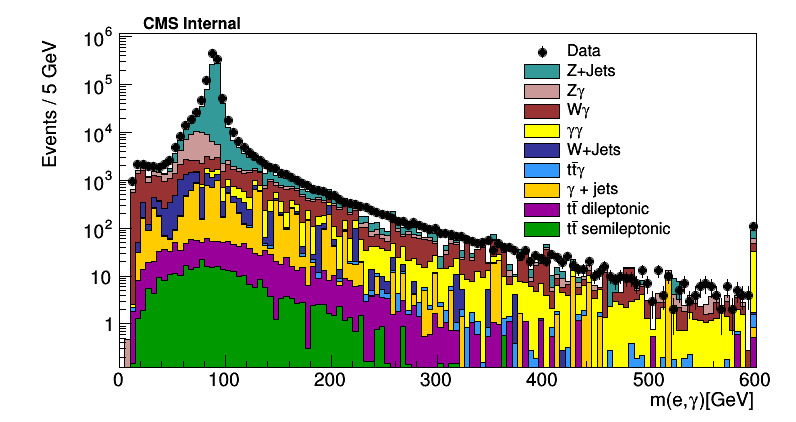

Info in <TCanvas::Print>: png file /tmp/tmp1LHPxL.png has been created


In [5]:
samples.Draw("m_lep_ph","(ph_n>0 && abs(ph_eta[0])<1.4 && met_pt<25)",(120,0,600),
             {"xlabel":"m(e,#gamma)","logy":1,"unblind": unblind, "weight": weight})

## photon eta distribution in high mass tail

 - MC has a flat distribution in eta, whereas Data tends to the beampipe

ph_eta[0] : met_pt<25  && m_lep_ph>300
Make SingleElectron hist ph_eta[0] :  ((met_pt<25  && m_lep_ph>300)&&(ph_hasPixSeed[0]==1 || met_pt<25))*PUWeight*NLOWeight


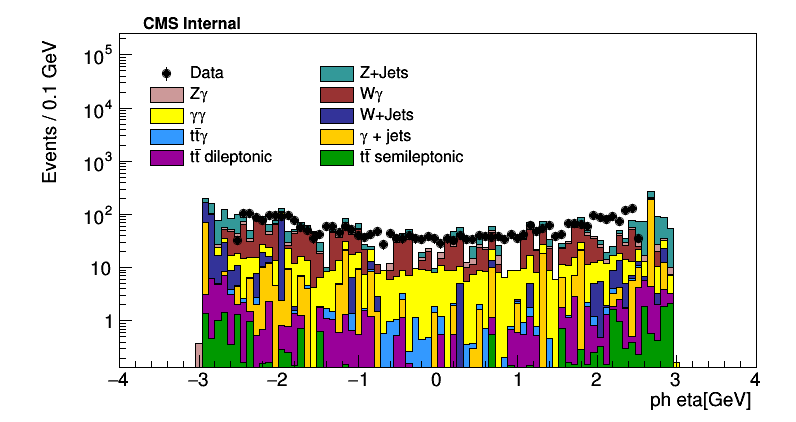

Info in <TCanvas::Print>: png file /tmp/tmpmu3LWU.png has been created


In [6]:
samples.Draw("ph_eta[0]","met_pt<25  && m_lep_ph>300",(100,-4,4),
             {"xlabel":"ph eta","logy":1,"ymax":1e5,"unblind": unblind, "weight": weight},{'legendLoc':'Double'})

## MET in high mass tail

- Data is blinded by MET and pixel veto cut

met_pt : m_lep_ph>200&& abs(ph_eta[0])<1.4
Make SingleElectron hist met_pt :  ((m_lep_ph>200&& abs(ph_eta[0])<1.4)&&(ph_hasPixSeed[0]==1 || met_pt<25))*PUWeight*NLOWeight


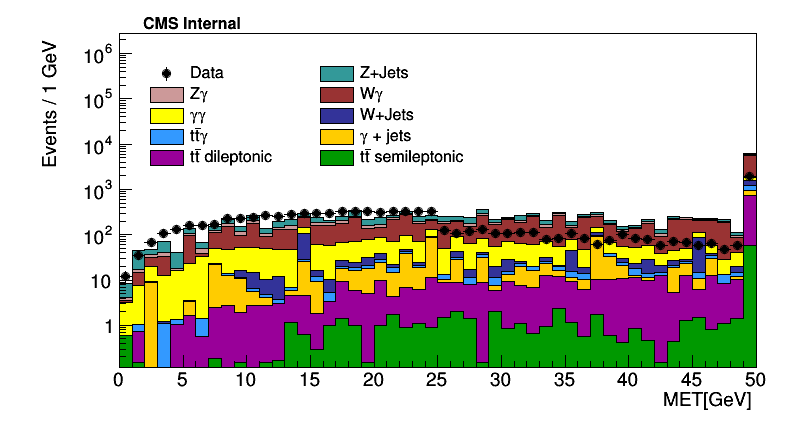

Info in <TCanvas::Print>: png file /tmp/tmpoTjcRQ.png has been created


In [8]:
samples.Draw("met_pt","m_lep_ph>200&& abs(ph_eta[0])<1.4",
             (50,0,50), {"xlabel":"MET","logy":1,"ymax":1e6,"unblind": unblind, "weight": weight},{'legendLoc':'Double'})

## MET in control region 

- required photon failing pixel seed veto
- $m(e,\gamma)$ > 150

### In endcap

met_pt : !ph_IsEB[0] && m_lep_ph>150&& ph_hasPixSeed[0]==1
Make SingleElectron hist met_pt :  ((!ph_IsEB[0] && m_lep_ph>150&& ph_hasPixSeed[0]==1)&&(ph_hasPixSeed[0]==1 || met_pt<25))*PUWeight*NLOWeight


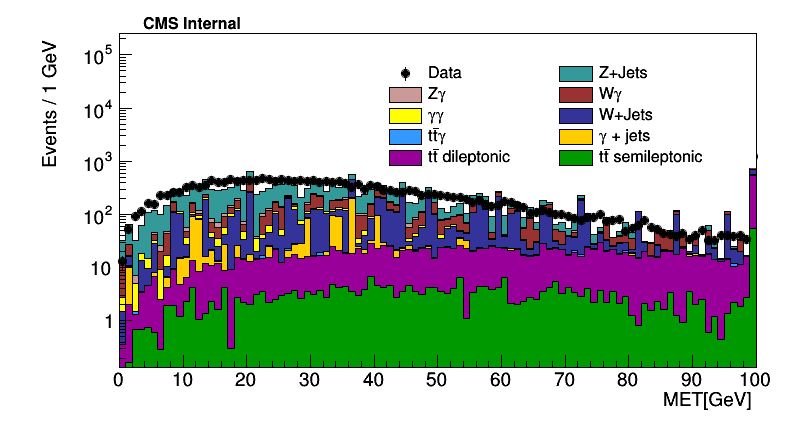

Info in <TCanvas::Print>: png file /tmp/tmpwiHPi3.png has been created


In [10]:
samples.Draw("met_pt","!ph_IsEB[0] && m_lep_ph>150"+b4, (100,0,100),
             {"xlabel":"MET","logy":1,"ymax":1e5,"unblind": unblind, "weight": weight },{'legendLoc':'Double', 'legendTranslateX':.3})

### In barrel

met_pt : ph_IsEB[0]&& m_lep_ph>150&& ph_hasPixSeed[0]==1
Make SingleElectron hist met_pt :  ((ph_IsEB[0]&& m_lep_ph>150&& ph_hasPixSeed[0]==1)&&(ph_hasPixSeed[0]==1 || met_pt<25))*PUWeight*NLOWeight


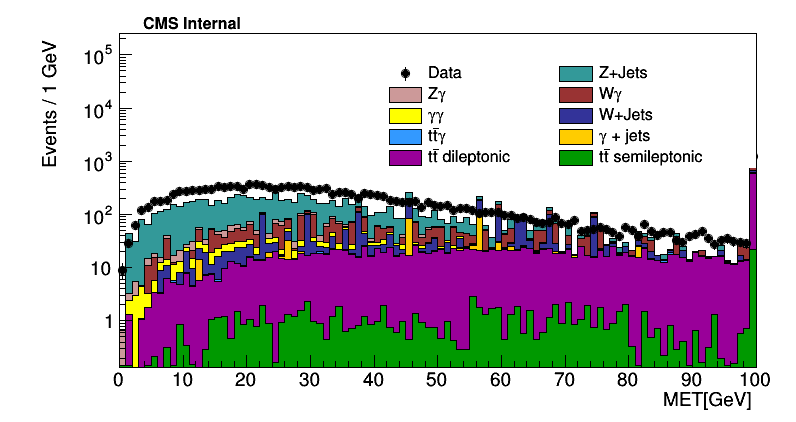

Info in <TCanvas::Print>: png file /tmp/tmpvPlgNm.png has been created


In [28]:
samples.Draw("met_pt","ph_IsEB[0]&& m_lep_ph>150"+b4,(100,0,100),
             {"xlabel":"MET","logy":1,"ymax":1e5,"unblind": unblind, "weight": weight},{'legendLoc':'Double','legendTranslateX':.3})

## Conclusion

- Everything looks much better

documentation: http://hepcms-hn.umd.edu/~kakw/2018_09_21_Reco_mass_tail_redo.html

#   

#   

#   

#   

# BACKUP

#   


ph_pt[0] :  abs(ph_eta[0])<1.4 && met_pt<25  && m_lep_ph>200
Make SingleElectron hist ph_pt[0] :  (( abs(ph_eta[0])<1.4 && met_pt<25  && m_lep_ph>200)&&(ph_hasPixSeed[0]==1 || met_pt<25))*PUWeight*NLOWeight


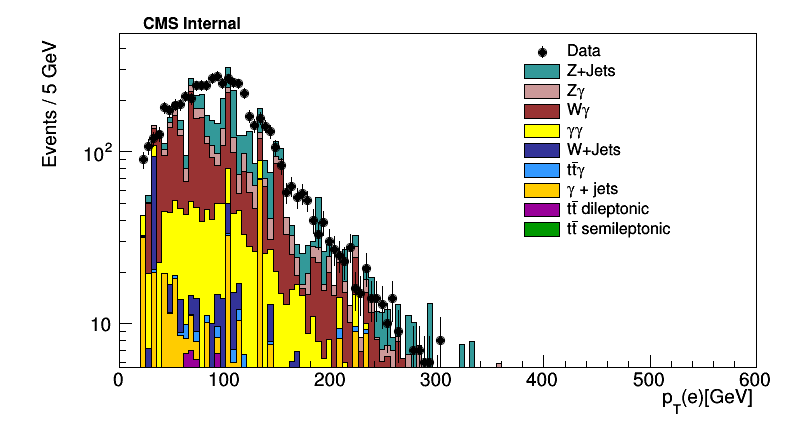

Info in <TCanvas::Print>: png file /tmp/tmp6ZBqbG.png has been created


In [23]:
samples.Draw("ph_pt[0]"," abs(ph_eta[0])<1.4 && met_pt<25  && m_lep_ph>200",(120,0,600),
             {"xlabel":"p_{T}(e)","logy":1,"ymin":10,"unblind": unblind, "weight": weight})

### photon pT requiring photon |eta| < 1.4  and m(e,g)>200GeV


ph_pt[0]-ph_pt[1] : ph_n>1
skipped  <Sample Data at 7eff8c855050>


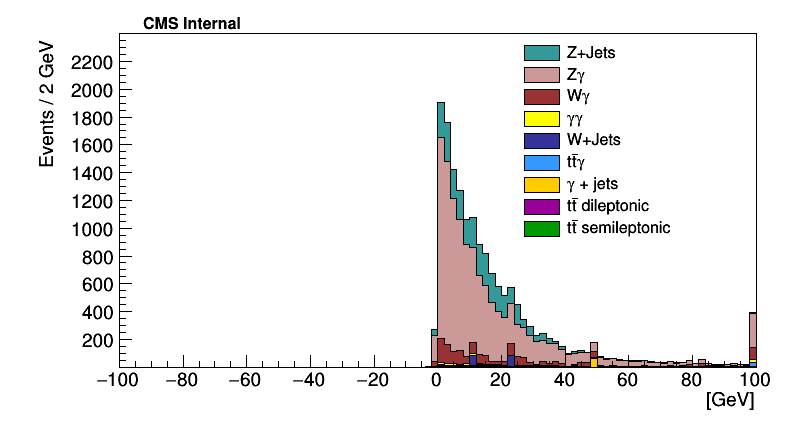

Info in <TCanvas::Print>: png file /tmp/tmpqQPzTf.png has been created


In [25]:
samples.Draw("ph_pt[0]-ph_pt[1]","ph_n>1",(100,-100,100))

### weights applied

- TTgamma Wgamma, gammagamma and Zgamma have negative weights
- Data should be all 1

NLOWeight : 1
Make SingleElectron hist NLOWeight :  (1)&&(ph_hasPixSeed[0]==1 || met_pt<25)


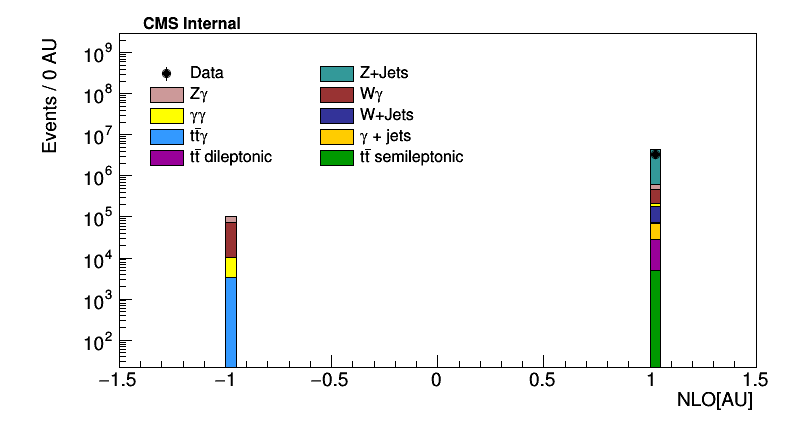

Info in <TCanvas::Print>: png file /tmp/tmprCfHUj.png has been created


In [26]:
samples.Draw("NLOWeight","1",
             (60,-1.5,1.5), {"xlabel":"NLO", "xunit":"AU","logy":1,'ymin':100,'ymax':1e9,"unblind": unblind},{'legendLoc':'Double'})

PUWeight : 1
Make SingleElectron hist PUWeight :  (1)&&(ph_hasPixSeed[0]==1 || met_pt<25)


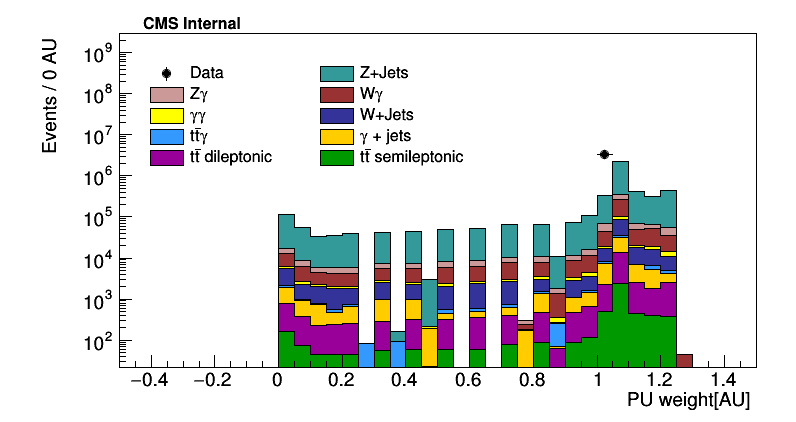

Info in <TCanvas::Print>: png file /tmp/tmpJtWf4s.png has been created


In [27]:
samples.Draw("PUWeight","1",
             (40,-0.5,1.5), {"xlabel":"PU weight", "xunit":"AU","logy":1,'ymin':100,'ymax':1e9,"unblind": unblind},{'legendLoc':'Double'})



|          |  MET<25   |MET>25, inv Z cut  |
|----------|-----------|-----------|
|pass eVeto|A          |Signal     |
|fail eVeto|B          | D         |

In [29]:
!bash /home/kakw/forjupyter/jupyterconvert.sh /home/kakw/public_html/ 2018_09_21_Reco_mass_tail_redo.ipynb

**** Following environment variables are going to be unset.
       DBS_CLIENT_CONFIG
       DBSCMD_HOME
       PYTHON_VALGRIND_SUPP
[NbConvertApp] Converting notebook 2018_09_21_Reco_mass_tail_redo.ipynb to slides
[NbConvertApp] Writing 496160 bytes to 2018_09_21_Reco_mass_tail_redo.slides.html
[NbConvertApp] Converting notebook 2018_09_21_Reco_mass_tail_redo.ipynb to html
[NbConvertApp] Writing 515793 bytes to 2018_09_21_Reco_mass_tail_redo.html
Sat Sep 22 01:56:05 EDT 2018
